# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [45]:
#Import all the necessary modules
import numpy as np
import pandas as pd
%matplotlib inline

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [36]:
pima = pd.read_csv("C:\\Users\\Welcome\\Desktop\\G Lakes\\AIML\\Pima.csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [37]:
pima.head(10)

,Pregnencies,Glucose,BP,Skin,Insulin,BMI,DPF,Age,Out
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [38]:
print (pima.dtypes)
print ("\nShape of the  PIMA dataset is, ", pima.shape)

Pregnencies      int64
Glucose          int64
BP               int64
Skin             int64
Insulin          int64
BMI            float64
DPF            float64
Age              int64
Out              int64
dtype: object

Shape of the  PIMA dataset is,  (768, 9)


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [39]:
for col in pima.columns:
    if col not in ("Out"):
        pima[col] = pima[col].replace(0, pima[col].median())

# Q5 Print the descriptive statistics of each & every column using describe() function

In [41]:
pima.describe()

,Pregnencies,Glucose,BP,Skin,Insulin,BMI,DPF,Age,Out
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

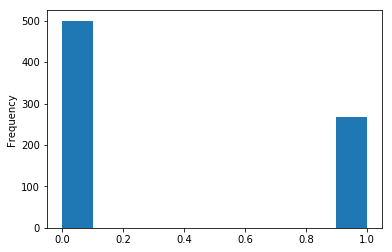

In [46]:
pima['Out'].plot(kind='hist')

In [47]:
pima.kurtosis(numeric_only = True)

Pregnencies    0.744680
Glucose       -0.257847
BP             1.098239
Skin           4.716995
Insulin        9.741075
BMI            0.921296
DPF            5.594954
Age            0.643159
Out           -1.600930
dtype: float64

# Could infer that Glucose variable is lightly skewed around its tails where as every other variable excluding Out is heavliy skewed on its tail 

In [49]:
pima.skew(numeric_only = True)

Pregnencies    1.111795
Glucose        0.535587
BP             0.141885
Skin           1.223057
Insulin        2.693181
BMI            0.601059
DPF            1.919911
Age            1.129597
Out            0.635017
dtype: float64

# looks like  all the variables are skewed  on the possitive side  of t he distribution

In [50]:
pima.corr()

,Pregnencies,Glucose,BP,Skin,Insulin,BMI,DPF,Age,Out
Pregnencies,1.000000,0.149326,0.247530,0.060706,-0.059580,0.080540,-0.016151,0.538169,0.245466
Glucose,0.149326,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BP,0.247530,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
Skin,0.060706,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.059580,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.080540,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DPF,-0.016151,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.538169,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Out,0.245466,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

Using bivariate analysis check for useful relationships between attributes and attributes and the target class



# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


In [60]:
print (len(pima[pima.BP == 72]))

79


C:\Users\Welcome\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Welcome\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


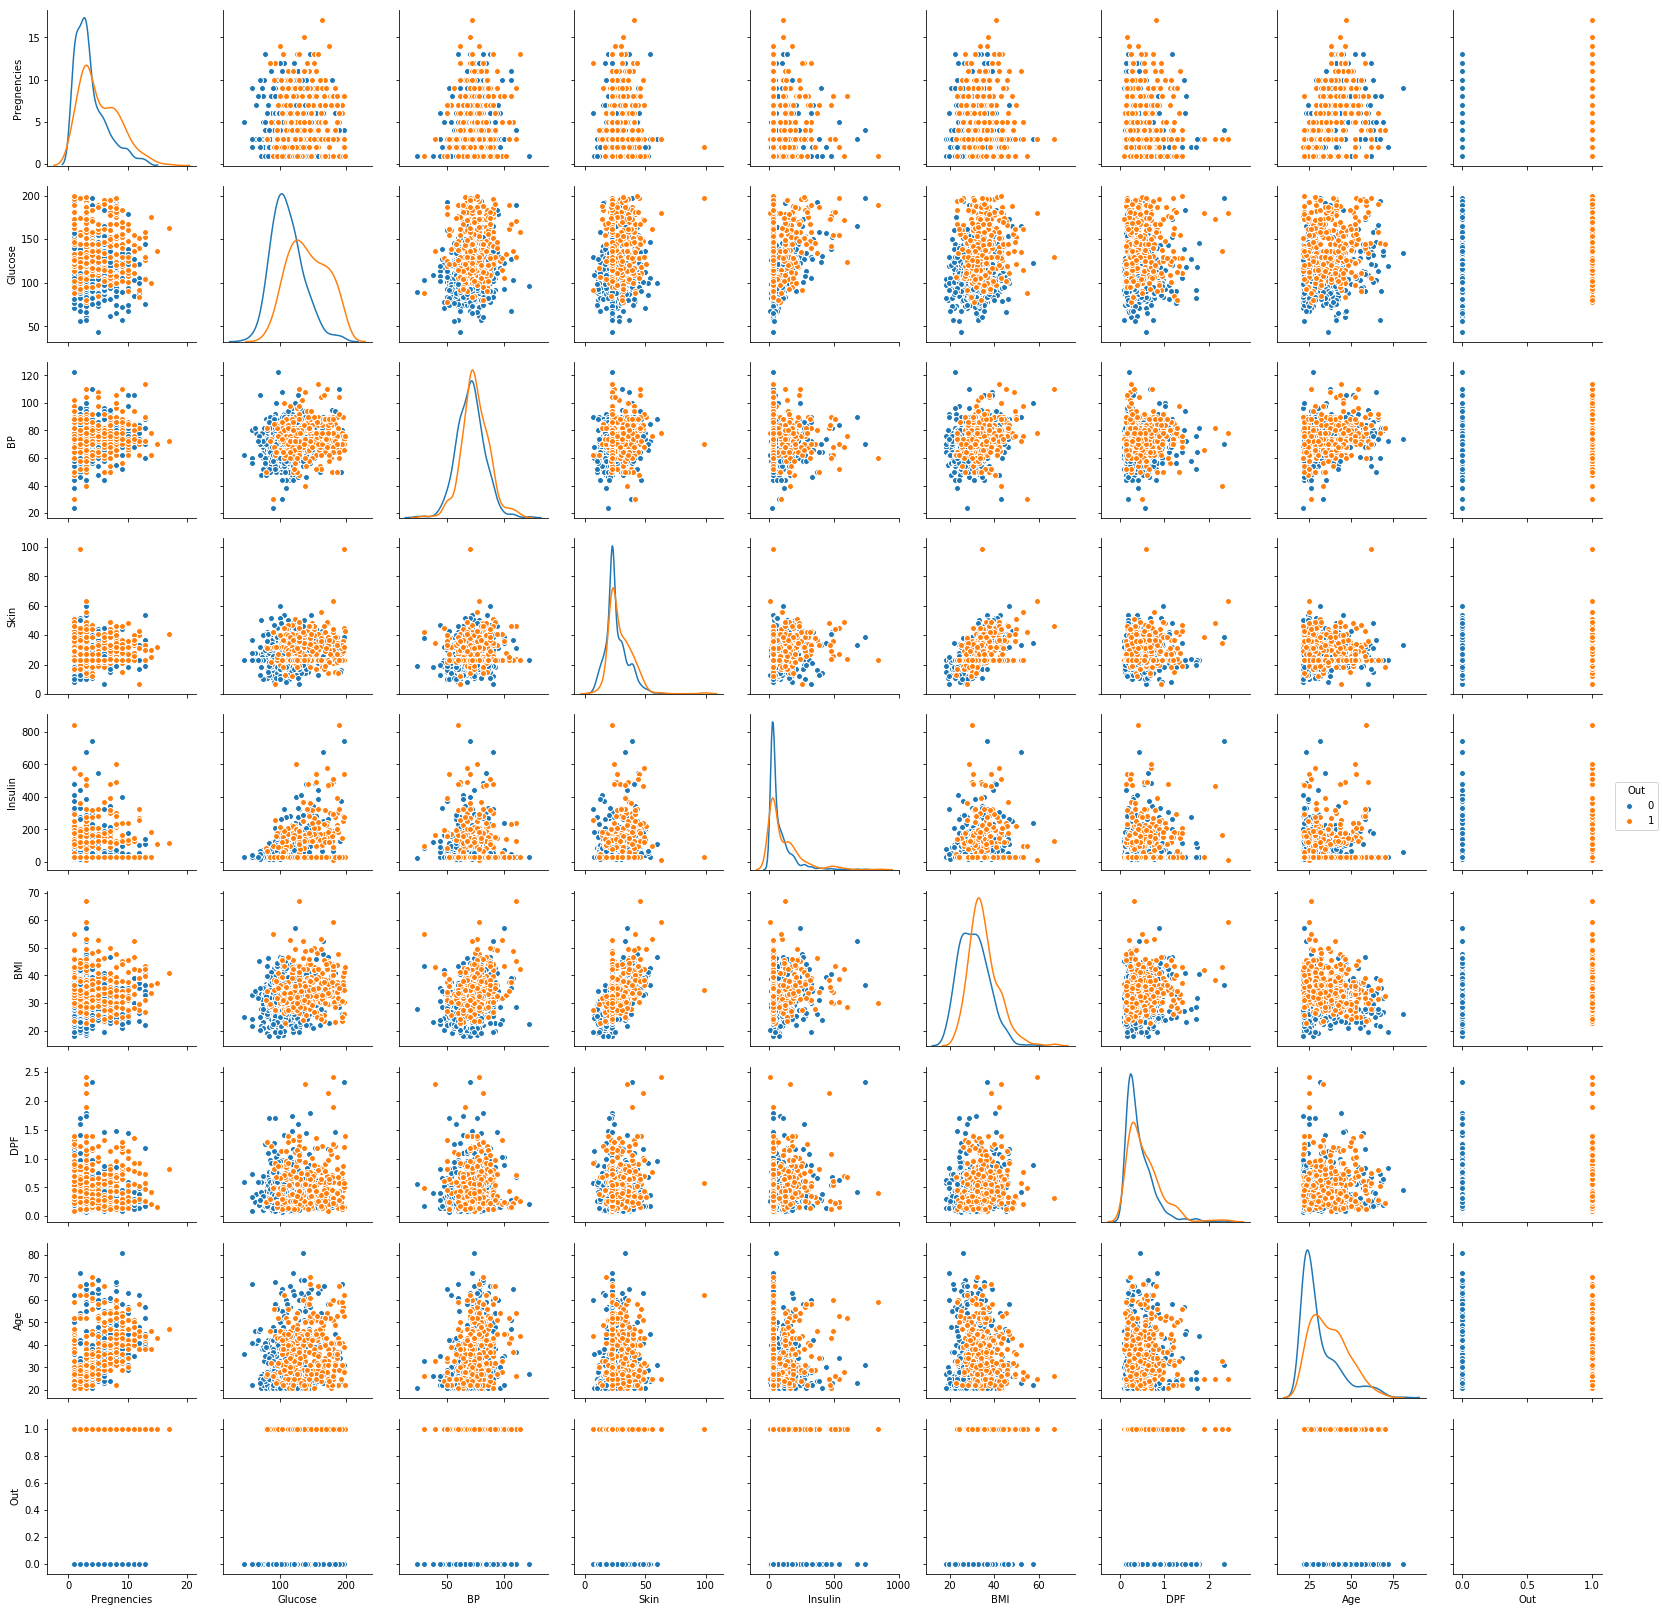

In [64]:
import seaborn as sns
sns.pairplot(pima,  diag_kind='kde', hue = 'Out')

In [ ]:
#   

Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [65]:
from sklearn.model_selection import train_test_split

In [89]:
array = pima.values
pima_x = array[:,0:7] # select all rows and first 8 columns which are the attributes
pima_y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(pima_x, pima_y, test_size=test_size, random_state=1)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.

In [90]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [91]:
dt_model.score(X_train , y_train)

1.0

Print the feature importance of the decision model - Optional

In [92]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = pima.columns[0:7]))

                  Imp
Pregnencies  0.105725
Glucose      0.275602
BP           0.104311
Skin         0.027030
Insulin      0.074562
BMI          0.237168
DPF          0.175602


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [93]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [97]:
from sklearn import metrics
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7619047619047619
[[129  17]
 [ 38  47]]


In [99]:
from sklearn.metrics import recall_score
recall_score(y_test, y_predict)

0.5529411764705883

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

# Recall is TP/(TP + FN)

0.7619047619047619

# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [133]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model,  n_estimators=10)
#abcl = AdaBoostClassifier( n_estimators=50)
abcl = abcl.fit(X_train, y_train)

In [134]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

print(metrics.confusion_matrix(y_test, y_predict))

0.7056277056277056
[[112  34]
 [ 34  51]]


In [135]:
recall_score(y_test, y_predict)

0.6

# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [112]:
from sklearn.ensemble import BaggingClassifier

#base_estimator - use the model as base I  createdearlier, its optional
# 

bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50)

#bgcl = BaggingClassifier(n_estimators=50)
bgcl = bgcl.fit(X_train, y_train)

In [113]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

print(metrics.confusion_matrix(y_test, y_predict))

0.7705627705627706
[[128  18]
 [ 35  50]]


In [114]:
recall_score(y_test, y_predict)

0.5882352941176471

# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(X_train, y_train)


In [122]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7792207792207793
[[126  20]
 [ 31  54]]


In [123]:
recall_score(y_test, y_predict)

0.6352941176470588

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.